# 1. Accedir a una API

## [Diapositives](https://docs.google.com/presentation/d/1jT1qFawiAYbUV_rrjUOn6V5BBUeXgwcJ0LYG-CV0jeQ/edit?usp=sharing)

Aqui veurem com accedir a una API Rest i com crear una per nosaltres mateixos

## 1.1 Consumir d'una API

Primerament haurem de preparar l'entorn:

In [ ]:
!python3 -m pip install requests

Una vegada instalat la llibreria, podem fer un import d'aquesta i utilitzar-la. Normalment la response d'un get sol està en format JSON, però això ho dictarà la nostra API.

### 1.1.1 Dog Facts

In [ ]:
import requests # Importem la llibreria

api_url = "https://dog-api.kinduff.com/api/facts" # Aquesta és l'URL de la nostra API. Endpoint /api/facts

response = requests.get(api_url) # Fem un request a la api amb un get
response.json() #Obtenim el JSON de la resposta!

{'facts': ['Dogs have no sense of time.'], 'success': True}

In [ ]:
response.status_code

200

In [ ]:
response.headers["Content-Type"]

'application/json;charset=utf-8'

## 1.2 HTTP Methods

Per poder practicar tots els mètodes HTTP, utilitzarem l'API [jsonplaceholder](https://jsonplaceholder.typicode.com/)

### 1.2.1 GET

In [ ]:
import requests

api_url = "https://jsonplaceholder.typicode.com/posts/1"

response = requests.get(api_url)
response.json()

{'userId': 1,
 'id': 1,
 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}

### 1.2.2 POST

Podem fer un POST amb un objecte Python:

In [ ]:
api_url = "https://jsonplaceholder.typicode.com/todos"
todo = {"userId": 1, "title": "Buy milk", "completed": False}
response = requests.post(api_url, json=todo)
response.json()

{'userId': 1, 'title': 'Buy milk', 'completed': False, 'id': 201}

In [ ]:
response.status_code

201

En una API real, una vegada fet el POST, la base de dades s'actualitzaria i podriem accedir a la informació fent un get!

In [ ]:
api_url = "https://jsonplaceholder.typicode.com/todos/201"

response = requests.get(api_url)
response.json()

{}

També podem en comptes d'utilitzar un objecte python, utilitzar directament **JSON**, però haurem d'especificar-ho:

In [ ]:
import json

api_url = "https://jsonplaceholder.typicode.com/todos"
todo = {"userId": 1, "title": "Buy milk", "completed": False} 

headers =  {"Content-Type":"application/json"}
response = requests.post(api_url, data=json.dumps(todo), headers=headers)
response.json()

{'userId': 1, 'title': 'Buy milk', 'completed': False, 'id': 201}

### 1.2.3 PUT

Amb aquest mètode podem fer un update de les dades:

In [ ]:
api_url = "https://jsonplaceholder.typicode.com/todos/10"
response = requests.get(api_url)
print("\nResposta a l'id 10 abans de fer el put: ")
print(response.json())


todo = {"userId": 1, "title": "Wash car", "completed": True}
response = requests.put(api_url, json=todo)
print("\n\nResposta a l'id 10 després de fer el put: ")

print(response.json())

print("\n\nSatatus code ")
print(response.status_code)


Resposta a l'id 10 abans de fer el put: 
{'userId': 1, 'id': 10, 'title': 'illo est ratione doloremque quia maiores aut', 'completed': True}


Resposta a l'id 10 després de fer el put: 
{'userId': 1, 'title': 'Wash car', 'completed': True, 'id': 10}


Satatus code 
200


### 1.2.4 DELETE

Una vegada hem vist els 3 primers CRUD, ens queda el Delete. Existeixen molts mètodes, però aquests són els prinicpals. La resposta és l'estat final de la crida.

In [ ]:
api_url = "https://jsonplaceholder.typicode.com/todos/10"
response = requests.delete(api_url)
response.json()

{}

In [ ]:
response.status_code

200

<br>

## 1.3 Query params

També podem tenir query paramseters com a informació extra a l'hora de fer una crida a la API

In [ ]:
api_url = "https://dog-api.kinduff.com/api/facts" #Volem cridar a https://dog-api.kinduff.com/api/facts?number=5
params = {
    "number": 5
}
response = requests.get(api_url, params = params)

for res in response.json()['facts']:
    print("\n " + res)


 At about 6 inches, the Chihuahua is the shortest breed.

 Dogs are natural pack animals.

 About 12 percent of the air that a dog breathes goes into a special area in the back of the nose that is dedicated to smelling.

 Why are dogs’ noses so wet? Dogs’ noses secrete a thin layer of mucous that helps them absorb scent. They then lick their noses to sample the scent through their mouth.

 President Lyndon Johnson had two beagles named Him and Her.


<br>
<br>
<br>
<br>
<br>
<br>

# 2. Crear una API

Amb Python no només podem accedir a la informació d'una API, també podem crear la nostra pròpia! 


## 2.1 Creació de la Base de Dades

En aquest cas ens inventarem una base de dades en format CSV. 

En aquest cas tindrem una base de dades d'una gossera. Per una part, tindrem una taula amb els amos dels gossos i per l'altre els gossos. La taula dels amos contindràn una columna amb l'id de cada gos.



In [ ]:
import pandas as pd

gossos = {'id_gos': [101, 102, 103, 104, 105, 106], 'nom':['Pitufina', 'Rex', 'Lolo', 'Coco', 'Nina', 'Milka'], 
          "edat": [8,10,5,2,12,8]}
df_gossos = pd.DataFrame(data=gossos)
df_gossos

,id_gos,nom,edat
0,101,Pitufina,8
1,102,Rex,10
2,103,Lolo,5
3,104,Coco,2
4,105,Nina,12
5,106,Milka,8


In [ ]:
amos = {'id': [1, 2 ,3 ,4], 'Nom': ['Aina', 'Dani', 'Laia', 'Bego'], 'Gossos': [[101, 105], [102], [104], [103]]}
df_amos = pd.DataFrame(data=amos)
df_amos

,id,Nom,Gossos
0,1,Aina,"[101, 105]"
1,2,Dani,[102]
2,3,Laia,[104]
3,4,Bego,[103]


In [ ]:
import os  

os.makedirs('./data', exist_ok=True)  
df_gossos.to_csv('./data/gossos.csv', index=False)  

os.makedirs('./data', exist_ok=True)  
df_amos.to_csv('./data/amos.csv', index=False) 

In [ ]:
!ls data

amos.csv  gossos.csv


## 2.2 Inicialitzar l'API

En aquest cas, utilitzarem la llibreria Flask. Hi ha diferents llibreries per crear APIs.

In [ ]:
from flask import Flask
from flask_restful import Resource, Api, reqparse
import pandas as pd
import ast


app = Flask(__name__)
api = Api(app)

## 2.3 EndPoints i els primers GETs

Una vegada inicialitzada, ja podem començar a construïr l'API. Començarem definint els endpoints:

In [ ]:
class Gossos(Resource):
    def get(self):
        data = pd.read_csv('./data/gossos.csv')  # read CSV
        data = data.to_dict()  # convert dataframe to dictionary
        return {'data': data}, 200  # return data and 200 OK code
    
class Amos(Resource):
    def get(self):
        data = pd.read_csv('./data/amos.csv')  # read CSV
        data = data.to_dict()  # convert dataframe to dictionary
        return {'data': data}, 200  # return data and 200 OK code

Només podem fer un add_recource una vegada

In [ ]:
api.add_resource(Gossos, '/gossos')  # '/gossos' és el nostre punt d'entrada per els Gossos
api.add_resource(Amos, '/amos')  # '/amos' és el nostre punt d'entrada per els Amos

## 2.4 Inicialitzar l'API

In [ ]:
if __name__ == '__main__':
    app.run()  # run our Flask app

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [22/Jun/2022 14:12:25] "POST /gossos?id=106&nom=Lluna&edat=1 HTTP/1.1" 200 -


## 2.5 POST

Aqui volem crear un gos nou a la base de dades. Demanarem l'any de neixament, el nom i un id. Les dades les passarem a través dels paràmetres

In [ ]:
from flask import Flask
from flask_restful import Resource, Api, reqparse
import pandas as pd
import ast

## INIT THE APP

app = Flask(__name__)
api = Api(app)


## DEFINE CLASS

class Gossos(Resource):
    
    def get(self):
        data = pd.read_csv('./data/gossos.csv')  # read CSV
        data = data.to_dict()  # convert dataframe to dictionary
        return {'data': data}, 200  # return data and 200 OK code
    
    def post(self):
        parser = reqparse.RequestParser()  # initialize
        
        parser.add_argument('id', required=True)  # add args
        parser.add_argument('nom', required=True)
        parser.add_argument('edat', required=True)
        
        args = parser.parse_args()  # parse arguments to dictionary
        
        # create new dataframe containing new values
        new_data = pd.DataFrame({
            'id_gos': int(args['id']),
            'nom': args['nom'],
            'edat': int(args['edat'])
        }, index=[0])
        
        # read our CSV
        data = pd.read_csv('./data/gossos.csv')
        # add the newly provided values
        data = data.append(new_data, ignore_index=True)
        # save back to CSV
        data.to_csv('./data/gossos.csv', index=False)
        
        return {'data': data.to_dict()}, 200  # return data with 200 OK
    
    
    
class Amos(Resource):
    
    def get(self):
        data = pd.read_csv('./data/amos.csv')  # read CSV
        data = data.to_dict()  # convert dataframe to dictionary
        return {'data': data}, 200  # return data and 200 OK code
 
 ## Add Resource

api.add_resource(Gossos, '/gossos')  # '/gossos' és el nostre punt d'entrada per els Gossos
api.add_resource(Amos, '/amos')  # '/amos' és el nostre punt d'entrada per els Amos
    
## Init App
    
if __name__ == '__main__':
    app.run()  # run our Flask app
    

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [22/Jun/2022 14:48:15] "GET /gossos HTTP/1.1" 200 -


**POSTMAN** POST amb http://127.0.0.1:5000/gossos?id=101&nom=Sol&edat=0 ens retornarà tots els gossos més el nou

### 2.5.1 Incloure Errors

Hem de controlar la informació que afegim a la base de dades, per tant hem de comprovar que per exemple, no existeixin dos gossos amb el mateix ID!

In [ ]:
from flask import Flask
from flask_restful import Resource, Api, reqparse
import pandas as pd
import ast


## INIT THE APP

app = Flask(__name__)
api = Api(app)


## DEFINE CLASS

class Gossos(Resource):
    
    def get(self):
        data = pd.read_csv('./data/gossos.csv')  # read CSV
        data = data.to_dict()  # convert dataframe to dictionary
        return {'data': data}, 200  # return data and 200 OK code
    
    def post(self):
        parser = reqparse.RequestParser()  # initialize
        
        parser.add_argument('id', required=True)  # add args
        parser.add_argument('nom', required=True)
        parser.add_argument('edat', required=True)
        
        args = parser.parse_args()  # parse arguments to dictionary
        
        
        # read our CSV
        data = pd.read_csv('./data/gossos.csv')
        
        if int(args['id']) in list(data['id_gos']):
            return {
                'message': f"'{args['id']}' already exists."
            }, 401
        else:
            # create new dataframe containing new values
            new_data = pd.DataFrame({
                'id_gos': int(args['id']),
                'nom': args['nom'],
                'edat': int(args['edat'])
            }, index=[0])
            # add the newly provided values
            data = data.append(new_data, ignore_index=True)
            # save back to CSV
            data.to_csv('./data/gossos.csv', index=False)

            return {'data': data.to_dict()}, 200  # return data with 200 OK
    
    
    
class Amos(Resource):
    
    def get(self):
        data = pd.read_csv('./data/amos.csv')  # read CSV
        data = data.to_dict()  # convert dataframe to dictionary
        return {'data': data}, 200  # return data and 200 OK code
 
 ## Add Resource

api.add_resource(Gossos, '/gossos')  # '/gossos' és el nostre punt d'entrada per els Gossos
api.add_resource(Amos, '/amos')  # '/amos' és el nostre punt d'entrada per els Amos
    
## Init App
    
if __name__ == '__main__':
    app.run()  # run our Flask app
    

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


127.0.0.1 - - [22/Jun/2022 15:04:59] "POST /gossos?id=101&nom=Sol&edat=0 HTTP/1.1" 401 -
127.0.0.1 - - [22/Jun/2022 15:05:10] "POST /gossos?id=107&nom=Sol&edat=0 HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2022 15:05:23] "POST /gossos?id=107&nom=Lluna&edat=4 HTTP/1.1" 401 -
127.0.0.1 - - [22/Jun/2022 15:05:26] "POST /gossos?id=108&nom=Lluna&edat=4 HTTP/1.1" 200 -


**POSTMAN** POST amb "http://127.0.0.1:5000/gossos?id=101&nom=Sol&edat=0" ens donarà error

<br><br>

Actualment tenim aquesta base de dades:

In [ ]:
import pandas as pd

df_gossos = pd.read_csv('data/gossos.csv')
df_gossos

,id_gos,nom,edat
0,101,Pitufina,8
1,102,Rex,10
2,103,Lolo,5
3,104,Coco,2
4,105,Nina,12
5,106,Milka,8
6,107,Sol,0
7,108,Lluna,4


## 2.6 PUT

Semblant al POST, hem de seleccionar quin element és el que volem escollir per fer l'update, en aquest cas la Bego s'ha animat a adoptar un altre gos que ha entrat a la cossera, així que haurem d'actualitzar la seva fixa!

In [ ]:
from flask import Flask
from flask_restful import Resource, Api, reqparse
import pandas as pd
import ast


## INIT THE APP

app = Flask(__name__)
api = Api(app)


## DEFINE CLASS

class Gossos(Resource):
    
    def get(self):
        data = pd.read_csv('./data/gossos.csv')  # read CSV
        data = data.to_dict()  # convert dataframe to dictionary
        return {'data': data}, 200  # return data and 200 OK code
    
    def post(self):
        parser = reqparse.RequestParser()  # initialize
        
        parser.add_argument('id', required=True)  # add args
        parser.add_argument('nom', required=True)
        parser.add_argument('edat', required=True)
        
        args = parser.parse_args()  # parse arguments to dictionary
        
        
        # read our CSV
        data = pd.read_csv('./data/gossos.csv')
        
        if int(args['id']) in list(data['id_gos']):
            return {
                'message': f"'{args['id']}' already exists."
            }, 401
        else:
            # create new dataframe containing new values
            new_data = pd.DataFrame({
                'id_gos': int(args['id']),
                'nom': args['nom'],
                'edat': int(args['edat'])
            }, index=[0])
            # add the newly provided values
            data = data.append(new_data, ignore_index=True)
            # save back to CSV
            data.to_csv('./data/gossos.csv', index=False)

            return {'data': data.to_dict()}, 200  # return data with 200 OK
    
    
    
class Amos(Resource):
    
    def get(self):
        data = pd.read_csv('./data/amos.csv')  # read CSV
        data = data.to_dict()  # convert dataframe to dictionary
        return {'data': data}, 200  # return data and 200 OK code
    
    def put(self):
        
        parser = reqparse.RequestParser()  # initialize
        parser.add_argument('id', required=True)  # add args
        parser.add_argument('id_gos', required=True)
        args = parser.parse_args()  # parse arguments to dictionary

        # read our CSV
        data = pd.read_csv('./data/amos.csv')
        
        if int(args['id']) in list(data['id']):
            
            # evaluate strings of lists to lists
            data['Gossos'] = data['Gossos'].apply(
                lambda x: ast.literal_eval(x)
            )
            # select our owner
            owner_data = data[data['id'] == int(args['id'])]

            # update user's locations
            owner_data['Gossos'] = owner_data['Gossos'].values[0] \
                .append(int(args['id_gos']))
            
            # save back to CSV
            data.to_csv('./data/amos.csv', index=False)
            # return data and 200 OK
            return {'data': data.to_dict()}, 200

        else:
            # otherwise the userId does not exist
            return {
                'message': f"'{args['id']}' user not found."
            }, 404
 
 ## Add Resource

api.add_resource(Gossos, '/gossos')  # '/gossos' és el nostre punt d'entrada per els Gossos
api.add_resource(Amos, '/amos')  # '/amos' és el nostre punt d'entrada per els Amos
    
## Init App
    
if __name__ == '__main__':
    app.run()  # run our Flask app
    

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


/tmp/ipykernel_10008/3441302535.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owner_data['Gossos'] = owner_data['Gossos'].values[0] \
127.0.0.1 - - [22/Jun/2022 15:15:55] "PUT /amos?id=4&id_gos=107 HTTP/1.1" 200 -


Ara visualitzem les dades:

In [ ]:
import pandas as pd

df_amos = pd.read_csv('data/amos.csv')
df_amos

,id,Nom,Gossos
0,1,Aina,"[101, 105]"
1,2,Dani,[102]
2,3,Laia,[104]
3,4,Bego,"[103, 107]"


## 2.7 DELETE

Imagina que la Milka és una gossa que estava perduda, i els seus amos originals l'han vingut a buscar. No ens interessa tenir al registre la Milka, ja que no és un gos al qual hagin adoptat o per adoptar. Farem un mètode per borrar els gossos de la base de dades:

In [ ]:
from flask import Flask
from flask_restful import Resource, Api, reqparse
import pandas as pd
import ast


## INIT THE APP

app = Flask(__name__)
api = Api(app)


## DEFINE CLASS

class Gossos(Resource):
    
    def get(self):
        data = pd.read_csv('./data/gossos.csv')  # read CSV
        data = data.to_dict()  # convert dataframe to dictionary
        return {'data': data}, 200  # return data and 200 OK code
    
    def post(self):
        parser = reqparse.RequestParser()  # initialize
        
        parser.add_argument('id', required=True)  # add args
        parser.add_argument('nom', required=True)
        parser.add_argument('edat', required=True)
        
        args = parser.parse_args()  # parse arguments to dictionary
        
        
        # read our CSV
        data = pd.read_csv('./data/gossos.csv')
        
        if int(args['id']) in list(data['id_gos']):
            return {
                'message': f"'{args['id']}' already exists."
            }, 401
        else:
            # create new dataframe containing new values
            new_data = pd.DataFrame({
                'id_gos': int(args['id']),
                'nom': args['nom'],
                'edat': int(args['edat'])
            }, index=[0])
            # add the newly provided values
            data = data.append(new_data, ignore_index=True)
            # save back to CSV
            data.to_csv('./data/gossos.csv', index=False)

            return {'data': data.to_dict()}, 200  # return data with 200 OK
    
    def delete(self):
        parser = reqparse.RequestParser()  # initialize
        parser.add_argument('id', required=True)  # add args
        args = parser.parse_args()  # parse arguments to dictionary

        # read our CSV
        data = pd.read_csv('./data/gossos.csv')
        
        if int(args['id']) in list(data['id_gos']):
            
            data = data.drop(data[data.id_gos == int(args['id'])].index)
            
            # save back to CSV
            data.to_csv('./data/gossos.csv', index=False)
            # return data and 200 OK
            return {'data': data.to_dict()}, 200

        else:
            # otherwise the userId does not exist
            return {
                'message': f"'{args['id']}' dog not found."
            }, 404
    
class Amos(Resource):
    
    def get(self):
        data = pd.read_csv('./data/amos.csv')  # read CSV
        data = data.to_dict()  # convert dataframe to dictionary
        return {'data': data}, 200  # return data and 200 OK code
    
    def put(self):
        
        parser = reqparse.RequestParser()  # initialize
        parser.add_argument('id', required=True)  # add args
        parser.add_argument('id_gos', required=True)
        args = parser.parse_args()  # parse arguments to dictionary

        # read our CSV
        data = pd.read_csv('./data/amos.csv')
        
        if int(args['id']) in list(data['id']):
            
            # evaluate strings of lists to lists
            data['Gossos'] = data['Gossos'].apply(
                lambda x: ast.literal_eval(x)
            )
            # select our owner
            owner_data = data[data['id'] == int(args['id'])]

            # update user's locations
            owner_data['Gossos'] = owner_data['Gossos'].values[0] \
                .append(int(args['id_gos']))
            
            # save back to CSV
            data.to_csv('./data/amos.csv', index=False)
            # return data and 200 OK
            return {'data': data.to_dict()}, 200

        else:
            # otherwise the userId does not exist
            return {
                'message': f"'{args['id']}' user not found."
            }, 404
 
 ## Add Resource

api.add_resource(Gossos, '/gossos')  # '/gossos' és el nostre punt d'entrada per els Gossos
api.add_resource(Amos, '/amos')  # '/amos' és el nostre punt d'entrada per els Amos
    
## Init App
    
if __name__ == '__main__':
    app.run()  # run our Flask app
    

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


127.0.0.1 - - [22/Jun/2022 15:24:36] "DELETE /gossos?id=106 HTTP/1.1" 200 -


In [ ]:
import pandas as pd

df_gossos = pd.read_csv('data/gossos.csv')
df_gossos

,id_gos,nom,edat
0,101,Pitufina,8
1,102,Rex,10
2,103,Lolo,5
3,104,Coco,2
4,105,Nina,12
5,107,Sol,0
6,108,Lluna,4


### I ja està!

A partir d'aquí, pots aplicar moltes coses més a la teva api, així com pots personalitzar els mètodes segons els arguments donats. 

També podem crear diferents endpoints per les nostres classes així com crear endpoints dinàmics!!

<code> api.add_resource(User, '/user/', '/user/\<userid>') <code>
    
D'aquesta forma, podem fer un:

<code> def get(self, userid): <code>

<br><br><br>
# 3. Fun APIs

Ara que hem vist tot això, anem a veure alguna API interessant!

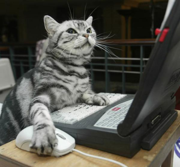

In [ ]:
import requests 
import os
from PIL import Image
import io

from IPython.display import display

api_url = "https://cataas.com/cat" 
filename = "cat.jpg"

response = requests.get(api_url) # Fem un request a la api amb un get
 #Obtenim el JSON de la resposta!
    
in_memory_file = io.BytesIO(response.content)
im = Image.open(in_memory_file)


scale = 0.3
display(im.resize(( int(im.width * scale), int(im.height * scale))))

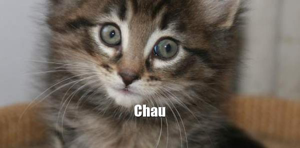

In [ ]:
import requests 
import os
from PIL import Image
import io

from IPython.display import display

api_url = "https://cataas.com/cat/cute/says/Chau" 
filename = "cat.jpg"

response = requests.get(api_url) # Fem un request a la api amb un get
 #Obtenim el JSON de la resposta!
    
in_memory_file = io.BytesIO(response.content)
im = Image.open(in_memory_file)


scale = 0.5
display(im.resize(( int(im.width * scale), int(im.height * scale))))

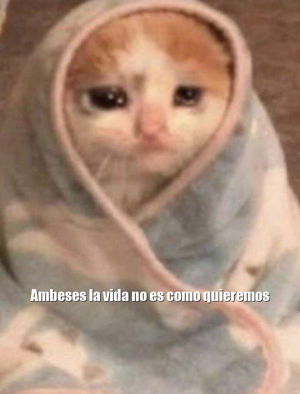

In [ ]:
import requests 
import os
from PIL import Image
import io

from IPython.display import display

api_url = "https://cataas.com/cat/sad/says/Ambeses la vida no es como quieremos" 
filename = "cat.jpg"

response = requests.get(api_url) # Fem un request a la api amb un get
 #Obtenim el JSON de la resposta!
    
in_memory_file = io.BytesIO(response.content)
im = Image.open(in_memory_file)


scale = 0.5
display(im.resize(( int(im.width * scale), int(im.height * scale))))